In [37]:
%matplotlib inline

In [38]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import yellowbrick as yb 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


## Using Yellowbrick to Boston Dataset

This is a user study to test YellowBrick library by exploring the Boston Dataset in sklearn. 

In [39]:
#loading the dataset, extracting the data, targets and feature names
boston = load_boston()
X, y = boston.data[:, None, 2], boston.target
# Use only one feature
features = boston.feature_names

In [40]:
X.shape

(506, 1)

In [41]:
y.shape

(506,)

In [42]:
from sklearn.cross_validation import train_test_split as tts

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot


model = LinearRegression()

# Split the data into training/testing sets
X_train = X[:-50]
X_test = X[-50:]

# Split the targets into training/testing sets
y_train = y[:-50]
y_test = y[-50:]


In [43]:
y_test.shape

(50,)

In [44]:
X_test.shape

(50, 1)

Coefficients: 
 [-0.66651004]
Variance score: 0.06


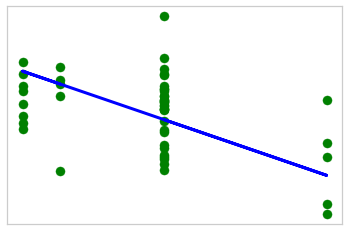

In [45]:

# Train the model using the training sets
model.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', model.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [46]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=10)


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


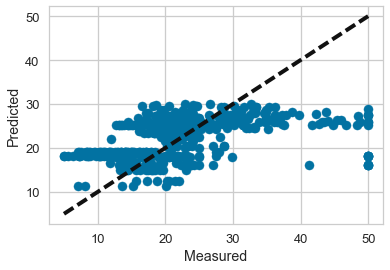

In [47]:


fig,ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()



In [48]:
y_pred.shape

(506,)

In [49]:
y.shape

(506,)

In [50]:
from yellowbrick.regressor import PredictionError
sviz = PredictionError(model)
sviz.score(y, y_pred)
sviz.poof() 

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,506) and (1,) not aligned: 506 (dim 1) != 1 (dim 0)